# Generic Data
- Age (by heat-health categories)
>Calculated with France's age distribution
>> https://www.statista.com/statistics/464032/distribution-population-age-group-france/

>> https://ourworldindata.org/grapher/under-5-population

- Gender
> Calculated with France's gender distribution
>> https://countrymeters.info/en/France#:~:text=Demographics%20of%20France%202022&text=Due%20to%20external%20migration%2C%20the,1%2C000%20females%20as%20of%202022.

In [ ]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Define the number of data points
num_samples = 32500 #1/2000 of the French population

# Define age groups and their proportions based on your statistics
age_groups = ['0-4', '5-12', '13-18', '19-34', '35-44', '45-74', '75-104']
age_proportions = [0.0839, 0.0821, 0.0694, 0.1725, 0.1245, 0.3669, 0.1007]
age_ranges = [(0, 4), (5, 12), (13, 18), (19, 34), (35, 44), (45, 74), (75, 110)]

ages = []
for people in range(num_samples):
    age_range_str = np.random.choice(age_groups, p=age_proportions)
    #Find the index of the string-> it matches the index of age_ranges
    age_range = age_ranges[age_groups.index(age_range_str)]
    #age_range is a tuple where age_range[0] is the lowest value in range and age_range[1] is the highest
    age = np.random.randint(age_range[0], age_range[1]+1)
    ages.append(age)



# Define gender proportions
gender_proportions = {'Male': 0.4870, 'Female': 0.5130}

# Create a DataFrame with synthetic data
data = {
    'Age': ages,
    'Gender': np.random.choice(list(gender_proportions.keys()), num_samples, p=list(gender_proportions.values())),
    # Add more columns for other variables (e.g., vulnerability factors) as needed
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the first few rows of the synthetic dataset
print(df.head())


   Age  Gender
0   31  Female
1   17    Male
2   70  Female
3    7    Male
4   39  Female


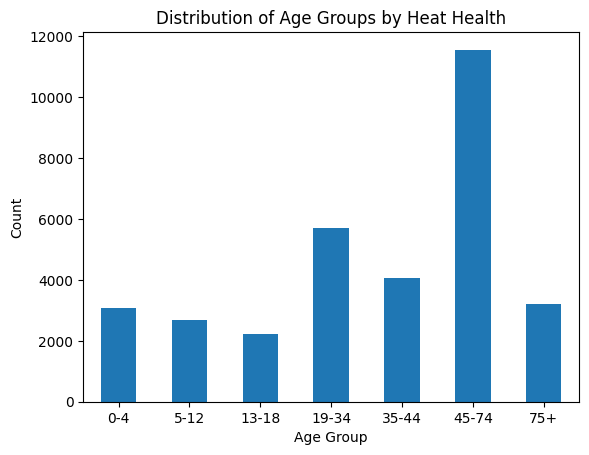

In [ ]:
import matplotlib.pyplot as plt

age_bins = [-1, 5, 13, 19, 35, 45, 75, 110]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=['0-4', '5-12', '13-18', '19-34', '35-44', '45-74', '75+'])

df['Age Group'].value_counts().sort_index().plot(kind='bar', rot=0)

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups by Heat Health")


plt.show()

# Medical Feature Inclusions:
- Minor or Acute Pathology
>> P(sick|summer|age): This is a complicated statistic to find, however from a general research, children under 5 are more likely to be sick and it is not common to be sick in the summer
>>> We will make 2% of every age range represent sickness and 3% if under 5
- Psychiatric Disorder
>> https://www.statista.com/statistics/1289614/number-of-people-treated-for-psychotic-disorders-in-france-by-age/
>> 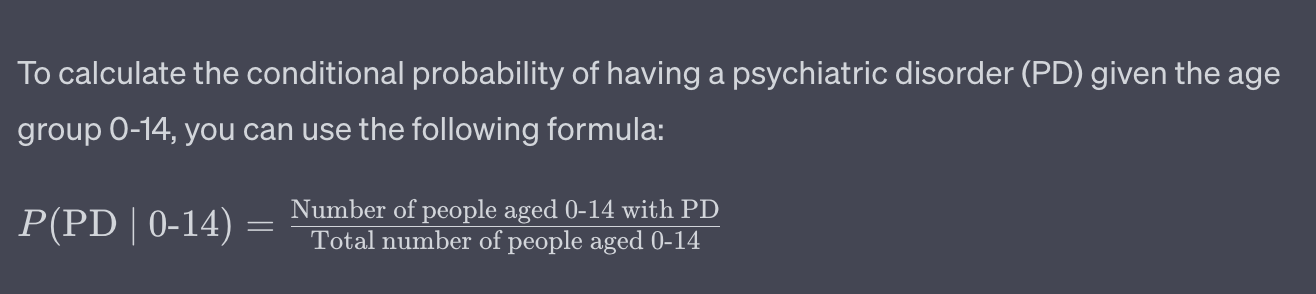
- Diabetes
>> "People with diabetes are 2 to 4 times more likely than others to develop cardiovascular disease", espeecially among younger people with diabetes John Hopkins Medicine

>> 0-14: 11,444.5

>> 15-19: 3,909.6

>> 20-79: 46,024

>>> https://diabetesatlas.org/data/en/country/71/fr.html

- Cardiovascular Disease
> We will take into account the following AHA findings:

>> The American Heart Association (AHA) reports that the incidence of CVD in US men and women is ~40% from 40–59 years, ~75% from 60–79 years, and ~86% in those above the age of 80

>>In the AHA 2019 Heart Disease and Stroke Statistical Update, the incidence of CVD was reported to be 77.2% in males and 78.2% in females, from ages 60–79 years [6]. Furthermore, the incidence of CVD was reported to be 89.3% in males, and 91.8% in females, in adults above 80 years of age

>> [1 in 100 babies born with CHD](https://www.marchofdimes.org/find-support/topics/planning-baby/congenital-heart-defects-and-critical-chds) which is a type of CVD

>> https://www.sciencedirect.com/science/article/pii/S187521361630047X#:~:text=Background-,Cardiovascular%20diseases%20(CVDs)%20constitute%20the%20second%20leading%20cause%20of%20death,%2F100%2C000)%20%5B1%5D.


In [ ]:
df['Minor Pathology'] = df['Age'].apply(lambda x: np.random.choice([0,1], p=[0.98, 0.02]) if x > 4 else np.random.choice([0,1], p=[0.97, 0.03]))

In [ ]:
probPD_0_14 = 1700/11696367
probPD_15_34 = 85200/15872193
probPD_35_54 = 192500/17061425
probPD_55_64 = 93200/8581390
probPD_65_74 = 64300/8040830
probPD_75_plus= 48100/6804299

df['Psychiatric Disorder'] = df['Age'].apply(lambda x: np.random.choice([0, 1], p=[1 - probPD_0_14, probPD_0_14]) if x < 15 else
                                                           np.random.choice([0, 1], p=[1 - probPD_15_34, probPD_15_34]) if 14 < x < 35 else
                                                           np.random.choice([0, 1], p=[1 - probPD_35_54, probPD_35_54]) if 34 < x < 55 else
                                                           np.random.choice([0, 1], p=[1 - probPD_55_64, probPD_55_64]) if 54 < x < 65 else
                                                           np.random.choice([0, 1], p=[1 - probPD_65_74, probPD_65_74]) if 64 < x < 75 else
                                                           np.random.choice([0, 1], p=[1 - probPD_75_plus, probPD_75_plus]))

filtered_df = df[(df['Psychiatric Disorder'] == 1) & (df['Minor Pathology'] == 1)]
filtered_df

,Age,Gender,Age Group,Minor Pathology,Psychiatric Disorder
4394,82,Female,75+,1,1
17424,73,Female,45-74,1,1


Text(0.5, 1.0, 'Distribution of Diabetes amongst Age Groups by Heat Health')

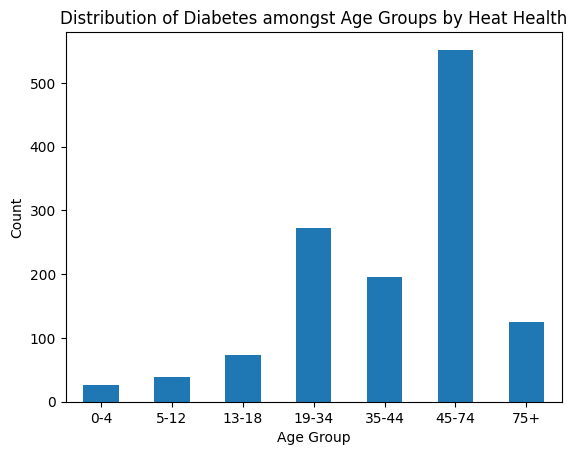

In [ ]:
diab_0_14 = 0.011444500
diab_15_19 = 0.03909600
diab_20_79 = 0.046024000
df['Diabetes'] = df['Age'].apply(lambda x: np.random.choice([0, 1], p=[1-diab_0_14, diab_0_14]) if x < 15 else
                                           np.random.choice([0, 1], p=[1-diab_15_19, diab_15_19]) if 15 <= x < 20 else
                                           np.random.choice([0, 1], p=[1-diab_20_79, diab_20_79])) # and 80+

filtered_df = df[(df['Diabetes'] == 1)]

filtered_df['Age Group'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Diabetes amongst Age Groups by Heat Health")

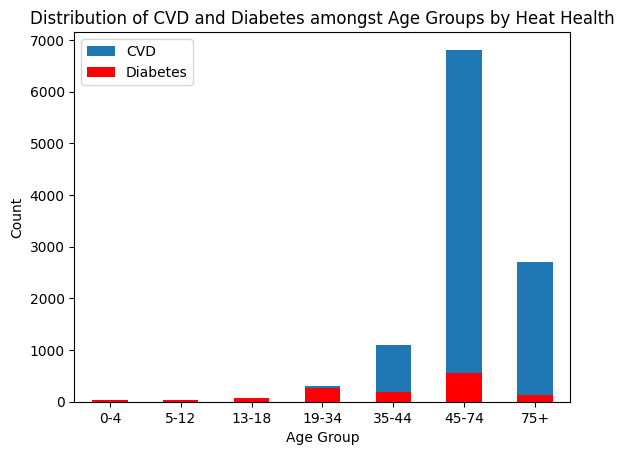

In [ ]:
diab_20_39 = 2*0.05
diab_40_59 = 2*0.4

df['Cardiovascular Disease'] = df.apply(lambda x: np.random.choice([0, 1], p=[0.99, 0.01]) if x['Age'] < 20 else
                                               np.random.choice([0, 1], p=[0.95, 0.05]) if 20 <= x['Age'] < 40 and #This probability was derived from general google searches
                                               x['Diabetes'] == 0 else
                                               np.random.choice([0, 1], p=[1-diab_20_39, diab_20_39]) if 20 <= x['Age'] < 40 and
                                               x['Diabetes'] == 1 else
                                               np.random.choice([0, 1], p=[0.6, 0.4]) if 40 <= x['Age'] < 60 and
                                               x['Diabetes'] == 0 else
                                               np.random.choice([0, 1], p=[1-diab_40_59, diab_40_59]) if 40 <= x['Age'] < 60 and
                                               x['Diabetes'] == 1 else
                                               np.random.choice([0, 1], p=[0.25, 0.75]) if 60 <= x['Age'] < 80 else
                                               np.random.choice([0, 1], p=[0.14, 0.86]), axis=1)


filtered_df2 = df[(df['Cardiovascular Disease'] == 1)]

filtered_df2['Age Group'].value_counts().sort_index().plot(kind='bar', rot=0)
filtered_df['Age Group'].value_counts().sort_index().plot(color='red', kind='bar', rot=0)

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of CVD and Diabetes amongst Age Groups by Heat Health")
plt.legend(labels=['CVD', 'Diabetes'], loc='upper left')


## Additional Medical Conditions

### Renal Disease

> "Between two and three million persons in France have a renal disease" 2016
>> https://www.cairn-int.info/journal-population-2016-1-page-23.htm
>>> France population 66.72 million (2016)

>> Researchers at Johns Hopkins University: More than 50 percent of seniors over the age of 75 are believed to have kidney disease

>> CKD is more common in people aged 65 years or older (34%) than in people aged 45–64 years (12%) or 18–44 years (6%).
>>> https://www.cdc.gov/kidneydisease/publications-resources/ckd-national-facts.html#:~:text=CKD%20by%20Age%2C%20Sex%2C%20and%20Race%2FEthnicity&text=CKD%20is%20more%20common%20in,%25)%20than%20men%20(12%25).

>> How many people with diabetes will develop kidney disease? About 30 percent of patients with Type 1 (juvenile-onset) diabetes and 10 to 40 percent of those with Type 2 (adult-onset) diabetes eventually will suffer from kidney failure.
>>> https://www.kidney.org › atoz › content › diabetes

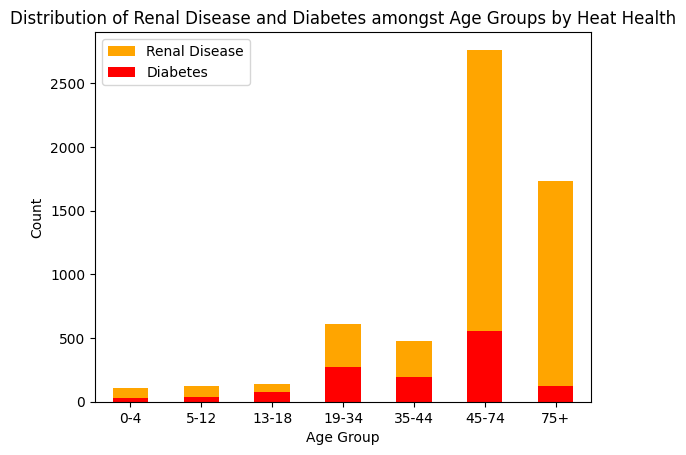

In [ ]:
renal_diab_TypeI = 0.3

def renal_diab_TypeII(age_group):
  probs = [i/100 for i in range(10, 41)]
  prob = np.random.choice(probs)
  prob = prob+age_group-(prob*age_group)
  return prob

prob_renal = 2500000/66720000
renal_75plus = prob_renal+0.51-(prob_renal*0.51)
renal_65_75 = prob_renal+0.34-(prob_renal*0.34)
renal_45_64 = prob_renal+0.12-(prob_renal*0.12)
renal_18_44 = prob_renal+0.06-(prob_renal*0.06)

#For simplicity of generation, we will naively use P(Renal|TypeI) for 18 and below only (30%)
prob_renal_TypeI = prob_renal+renal_diab_TypeI-(prob_renal*renal_diab_TypeI)
#And we will use P(Renal|TypeII) for 18 and above (anywhere from 10% to 40%)
prob_renal_18_44_TypeII = renal_diab_TypeII(renal_18_44)
prob_renal_45_64_TypeII = renal_diab_TypeII(renal_45_64)
prob_renal_65_75_TypeII = renal_diab_TypeII(renal_65_75)
prob_renal_75plus_TypeII = renal_diab_TypeII(renal_75plus)

df['Renal Disease'] = df.apply(lambda x: np.random.choice([0,1], p=[1-prob_renal,prob_renal]) if x['Diabetes'] == 0 and x['Age'] < 18 else
                                         np.random.choice([0,1], p=[1-(prob_renal_TypeI),prob_renal_TypeI]) if x['Diabetes'] == 1 and x['Age'] < 18 else
                                         np.random.choice([0,1], p=[1-renal_18_44,renal_18_44]) if x['Diabetes'] == 0 and 18 <= x['Age'] < 45 else
                                         np.random.choice([0,1], p=[1-prob_renal_18_44_TypeII,prob_renal_18_44_TypeII]) if x['Diabetes'] == 1 and 18 <= x['Age'] < 45 else
                                         np.random.choice([0,1], p=[1-renal_45_64,renal_45_64]) if x['Diabetes'] == 0 and 45 <= x['Age'] < 65 else
                                         np.random.choice([0,1], p=[1-prob_renal_45_64_TypeII,prob_renal_45_64_TypeII]) if x['Diabetes'] == 1 and 45 <= x['Age'] < 65 else
                                         np.random.choice([0,1], p=[1-renal_65_75,renal_65_75]) if x['Diabetes'] == 0 and 65 <= x['Age'] < 75 else
                                         np.random.choice([0,1], p=[1-prob_renal_65_75_TypeII,prob_renal_65_75_TypeII]) if x['Diabetes'] == 1 and 65 <= x['Age'] < 75 else
                                         np.random.choice([0,1], p=[1-renal_75plus,renal_75plus]) if x['Diabetes'] == 0 and 75 <= x['Age'] else
                                         np.random.choice([0,1], p=[1-prob_renal_75plus_TypeII,prob_renal_75plus_TypeII]), axis=1)

filtered_df3 = df[df['Renal Disease'] == 1]

filtered_df3['Age Group'].value_counts().sort_index().plot(color='orange', kind='bar', rot=0)
filtered_df['Age Group'].value_counts().sort_index().plot(color='red', kind='bar', rot=0)

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Renal Disease and Diabetes amongst Age Groups by Heat Health")
plt.legend(labels=['Renal Disease','Diabetes'], loc='upper left')


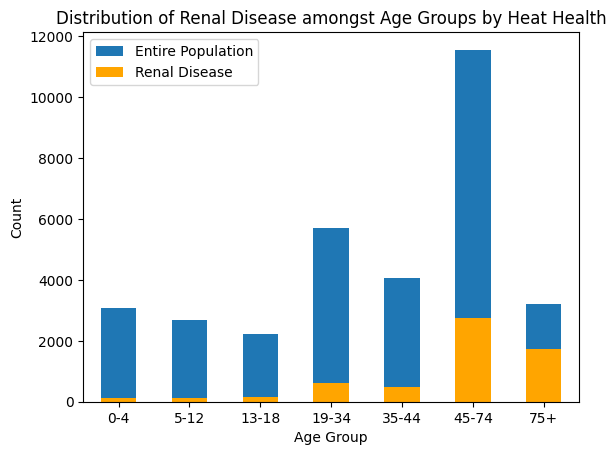

In [ ]:
df['Age Group'].value_counts().sort_index().plot(kind='bar', rot=0)
filtered_df3['Age Group'].value_counts().sort_index().plot(color='orange', kind='bar', rot=0)

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Renal Disease amongst Age Groups by Heat Health")
plt.legend(labels=['Entire Population','Renal Disease'], loc='upper left')

Text(0.5, 1.0, 'No Medical Condition Population by Heat Health Age Groups')

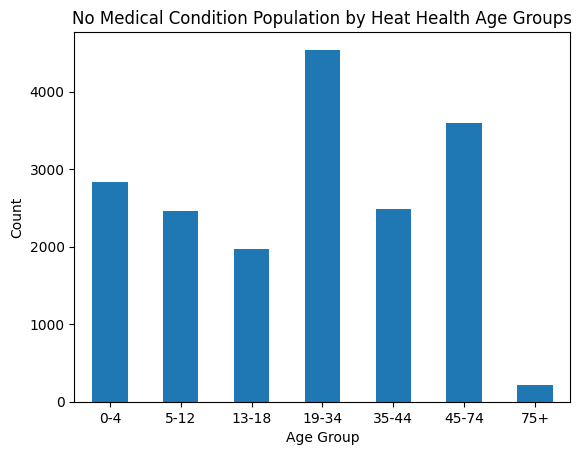

In [ ]:
temp = df.where((df['Diabetes']==0) & (df['Cardiovascular Disease']==0) & (df['Renal Disease']==0) & (df['Minor Pathology']==0) & (df['Psychiatric Disorder']==0)).dropna()
temp['Age Group'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("No Medical Condition Population by Heat Health Age Groups")

# Pregnancy


---


## Percent of births by age groups in France (2019)

> 15-24: 11.96%

> 25-29: 27.02%

> 30-34: 35.25%

> 35-39: 20.44%

> 40-50: 5.44%

Text(0.5, 1.0, 'Pregnant People by Age')

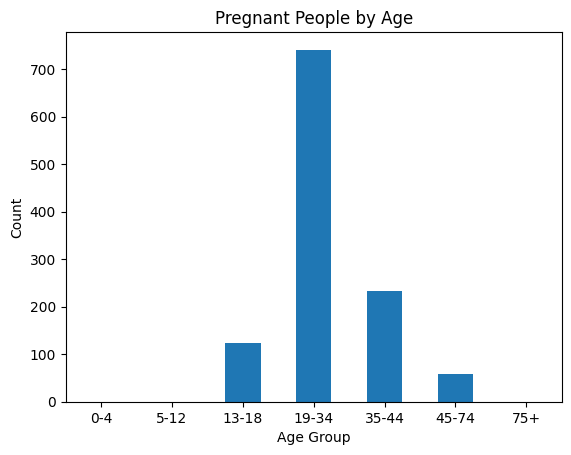

In [ ]:
p_15_24 = 0.1196
p_25_29 = 0.2702
p_30_34 = 0.3525
p_35_39 = 0.2044
p_40_50 = 0.0544

df['Pregnant'] = df.apply(lambda x: np.random.choice([0,1], p=[1-p_15_24, p_15_24]) if x['Gender']=='Female' and 15 <= x['Age'] < 25 else
                                   np.random.choice([0,1], p=[1-p_25_29, p_25_29]) if x['Gender']=='Female' and 25 <= x['Age'] < 30 else
                                   np.random.choice([0,1], p=[1-p_30_34, p_30_34]) if x['Gender']=='Female' and 30 <= x['Age'] < 35 else
                                   np.random.choice([0,1], p=[1-p_35_39, p_35_39]) if x['Gender']=='Female' and 35 <= x['Age'] < 40 else
                                   np.random.choice([0,1], p=[1-p_40_50, p_40_50]) if x['Gender']=='Female' and 40 <= x['Age'] < 50 else
                                   0, axis=1)

filtered_df4 = df[df['Pregnant'] == 1]

filtered_df4['Age Group'].value_counts().sort_index().plot(kind='bar', rot=0)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Pregnant People by Age')

# Risk Probability Generater


---

## Strategy

To reflect real-life variability where percentages aren't 100% representative, I am going to introduce some randomness into the risk score calculation. Adding a random component to the risk score can help with this.

I will also utilize [this study](https://www.mdpi.com/1660-4601/17/3/1004) where vulnerability is represented as a weight by medical professionals based on one's physio. This other [study](https://pubmed.ncbi.nlm.nih.gov/15613947/) gives additional weight to how diabetes in combination with age contribute to risk.

There is also a study done on the effect of heatwaves on pregnant people that can here referenced [here](https://www.pbs.org/newshour/health/extreme-heat-exposure-during-pregnancy-can-raise-risk-of-severe-delivery-complications-new-study-finds#:~:text=Researchers%20found%20that%20a%20high,of%20life%2Dthreatening%20delivery%20complications.) on how much more at risk to SMM one may be if pregnant and exposed to a heatwave (27% more at risk). To go along with this, [this finiding](https://nationalpartnership.org/report/higher-temperatures-hurt-moms/) mentions how longer exposure increases chances of hospitilization by 5%.

Additionally, this study done based on [Hospital Admissions in Chicago's Heatwave of 1995](https://pubmed.ncbi.nlm.nih.gov/10493281/) shows the percentage of excess people with certian medical conditions checked in to a hospital during a heatwave. This percentage will be utilized to calculate one's heat health risk as a weight.  

There was also a [study](https://link.springer.com/article/10.1007/s00420-006-0089-4) done in France on the 2003 Heatwave where excess mortality was revealed. This study will be used to add weights to each age groups likelihood of risk. This article also gives insight to gender and age with it's contribution to risk.

Lastly, a very recent [BBC post](https://www.bbc.com/future/article/20230918-how-community-maps-can-protect-children-from-extreme-heat) on how heatwaves affect gender revealed which age groups amongst children and in which order were most vulnerable to heatwaves. This will be taken into account when assesing risk factor in relation to youth.
These findings seemed to be based on [this research](https://pubmed.ncbi.nlm.nih.gov/34164839/#:~:text=Results%3A%20The%20average%20Tmax%20over,interquartile%20range\)%20increase%20in%20temperature) which states:

 > Results: The average Tmax over the study period was 80.3°F (range 50°, 104°F). Tmax conferred the greatest risk of ED visits for children aged 0-4, with a 6-day cumulative excess risk of 2.4% (95% confidence interval [CI] 1.7, 3.0) per 13°F (ie interquartile range) increase in temperature. Children and adolescents 5-12 years (0.8%, 95% CI 0.1, 1.6) and 13-18 years (1.4%, 95% CI 0.6, 2.3) are also sensitive to heat. For hospitalisations, only adolescents 13-18 years had increased heat-related risk, with a cumulative excess risk of 7.9% (95% CI 2.0, 14.2) per 13°F increase in Tmax over 85°F.

Overall, no mortality ratio significantly greater than unity was observed for subjects aged less than 35 years (Table 1). From the age of 35 years, the mortality ratios were significantly greater than 1 and increased regularly with age, rising from 1.19 for subjects aged 35–44 years to 2.00 for subjects aged 95 years and over. The number of excess deaths increased very rapidly with age: 11,731 of the 14,729 excess deaths occurred in subjects aged 75 years and over and 2,930 in subjects aged 35–74 years.
[article](https://link.springer.com/article/10.1007/s00420-006-0089-4)

In [ ]:
df = df.drop('Risk Score', axis=1)

In [ ]:
from pandas.core.internals.blocks import F
import random
import numpy as np

def calculate_risk_with_variability(row):
    # Initialize the risk score
    risk_score = 0.0

    # Calculate the age-based risk (you can adjust this calculation)
    age_factor = 0.0
    if row['Age Group'] == '75+':
        age_factor =  0.38 + 0.8 - (0.38*0.8) # excess mortalities in France + physio vulnerability
    elif row['Age Group'] == '45-74':
        age_factor = 0.08 + 0.2 - (0.08*0.2)  # excess mortalities in France + physio vulnerability
    elif row['Age Group'] == '35-44':
        age_factor = 0.04                     # more in feature interactions below
    elif row['Age Group'] == '19-34':
        age_factor = 0.04                     # no significant excess mortality nor significant stats on additional age vulnerability
    elif row['Age Group'] == '13-18':
        age_factor = 0.04 + 0.14 - (0.04*0.14)             # Child emergency hospital visits (13-18) during high temps + physio vulnerability
    elif row['Age Group'] == '5-12':
        age_factor = 0.04 + 0.08 - (0.04*0.08)             # Child emergency hospital visits (5-12) during high temps + physio vulnerability
    elif row['Age Group'] == '0-4':
        age_factor = 0.16 + 0.24 - (0.16*0.24)             # Child emergency hospital visits (0-4) during high temps + physio vulnerability

    # Weights * ([0, 1] * intensity of condition)
    random_variability = random.uniform(0.7, 1.00)
    random_additional_HW_days = random.uniform(1, 3) #typically heatwaves are 3 days in length

    diabetes_factor = 0.30 * row['Diabetes']
    pd_factor =  0.09 * (row['Psychiatric Disorder']*random_variability)
    m_pathology_factor = 0.25 * (row['Minor Pathology']*random_variability)
    cvd_factor = 0.23 * (row['Cardiovascular Disease']*random_variability)
    rd_factor = 0.52 * (row['Renal Disease']*random_variability)


    is2trimester = np.random.choice([True, False], p=[0.325, 0.675])
    if is2trimester == False:
      is3trimester = np.random.choice([True, False], p=[0.5, 0.5])

    if row['Pregnant'] == 1:
      if is2trimester:
        pregnant_factor = 0.27 * row['Pregnant']  + (random_additional_HW_days*0.05) # Every extra day of heatwave increases hospitilization by 5% (second trimester)
      elif is3trimester:
        pregnant_factor = 0.27 * row['Pregnant'] + (random_additional_HW_days*0.03) # Every extra day of heatwave increases hospitilization by 3% (third trimester)
      else:
        pregnant_factor = 0.27 * row['Pregnant']
    else:
      pregnant_factor = 0

    #Feature interactions
    if row['Age'] < 1 and row['Gender'] == 'Male':
      age_factor = age_factor + 0.29 - (age_factor*0.29)          # excess mortalities in France + physio vulnerability
    if row['Age Group'] == '35-44' and row['Gender'] == 'Male':
      age_factor = age_factor + 0.27 - (age_factor*0.27)          # excess mortalities in France + physio vulnerability
    if row['Age Group'] == '35-44' and row['Gender'] == 'Female':
      age_factor = age_factor + 0.2 - (age_factor*0.2)            # excess mortalities in France + physio vulnerability
    if 55 < row['Age'] and row['Gender'] == 'Female':
      age_factor = age_factor + 0.15 - (age_factor*0.15)          # % higher than men of same age + physio vulnerability

    # Calculate risk based on conditions
    raw_risk_score = (
      age_factor +
      diabetes_factor +
      pd_factor +
      m_pathology_factor +
      cvd_factor +
      rd_factor +
      pregnant_factor
    )

    # Introduce random variability (This can help prevent overfit, introduce new but likely scenarios and potentially facor
    #                               in things like one's socioeconomic situation, educational background, etc...)
    random_variability2 = random.uniform(-0.02, 0.02)  # Adjust the range as needed
    raw_risk_score += random_variability2
    # Ensure the risk score is between 0.0 and 1.0
    risk_score = max(0.0, min(0.99, raw_risk_score))

    return risk_score

# Apply the calculate_risk_with_variability function to your DataFrame to create a 'Risk_Score' column
df['Risk Score'] = df.apply(calculate_risk_with_variability, axis=1)




In [ ]:
df.to_csv('./SyntheticFrenchPopulation.csv')

In [ ]:
df.head(10)

,Age,Gender,Age Group,Minor Pathology,Psychiatric Disorder,Diabetes,Cardiovascular Disease,Renal Disease,Pregnant,Risk Score
0,31,Female,19-34,0,0,0,0,0,0,0.035290
1,17,Male,13-18,0,0,0,0,0,0,0.162534
2,70,Female,45-74,0,0,0,1,1,0,0.924251
3,7,Male,5-12,0,0,0,0,0,0,0.117689
4,39,Female,35-44,0,0,0,0,0,0,0.247819
5,68,Female,45-74,0,0,0,1,0,0,0.555740
6,65,Male,45-74,0,0,0,1,0,0,0.445908
7,104,Male,75+,0,0,0,1,0,0,0.990000
8,16,Female,13-18,0,0,0,0,0,0,0.180880
9,16,Male,13-18,0,0,0,0,0,0,0.177308


In [ ]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Minor Pathology,Psychiatric Disorder,Diabetes,Cardiovascular Disease,Renal Disease,Pregnant,Risk Score
Age,1.000000,-0.007640,0.034249,0.043504,0.629351,0.358691,-0.084967,0.686673
Minor Pathology,-0.007640,1.000000,-0.007206,-0.003965,-0.005279,-0.000892,0.005952,0.084706
Psychiatric Disorder,0.034249,-0.007206,1.000000,-0.006531,0.021346,0.002389,0.004607,0.030931
Diabetes,0.043504,-0.003965,-0.006531,1.000000,0.073286,0.130016,-0.003134,0.229541
Cardiovascular Disease,0.629351,-0.005279,0.021346,0.073286,1.000000,0.238112,-0.105681,0.638252
Renal Disease,0.358691,-0.000892,0.002389,0.130016,0.238112,1.000000,-0.034041,0.676154
Pregnant,-0.084967,0.005952,0.004607,-0.003134,-0.105681,-0.034041,1.000000,0.046871
Risk Score,0.686673,0.084706,0.030931,0.229541,0.638252,0.676154,0.046871,1.000000


# Visuals

Text(0.5, 1.0, 'Average Risk Score by Age Group')

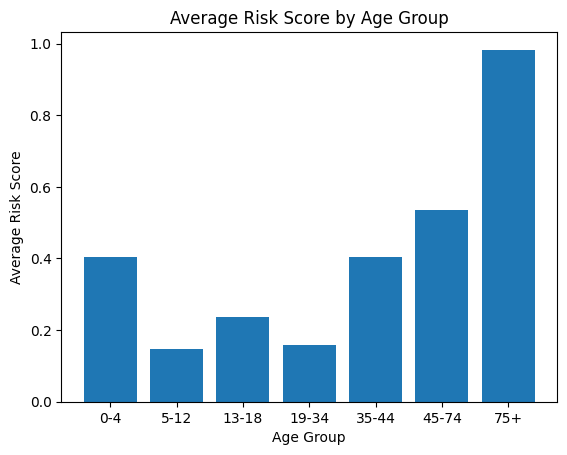

In [ ]:
filtered_df5 = df.groupby('Age Group')['Risk Score'].mean().reset_index()

plt.bar(filtered_df5["Age Group"], filtered_df5["Risk Score"])

plt.xlabel('Age Group')

plt.ylabel('Average Risk Score')

plt.title("Average Risk Score by Age Group")

In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Risk Score'], **{})
chart

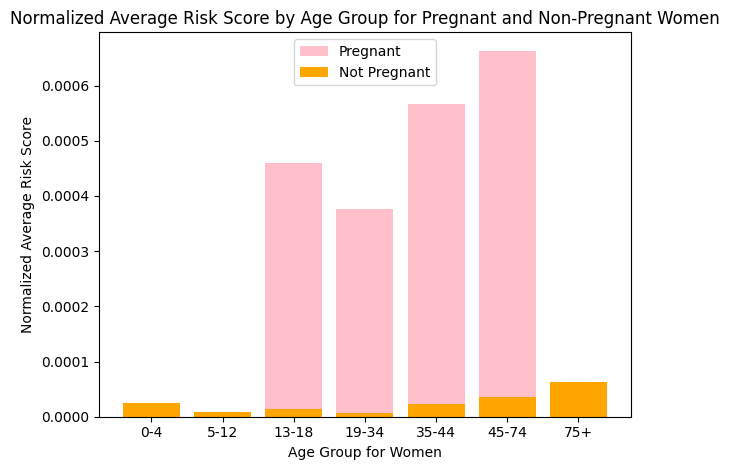

In [ ]:
import matplotlib.pyplot as plt

# Filter data for pregnant women
filtered_df6 = df[df['Pregnant'] == 1].groupby('Age Group')['Risk Score'].mean().reset_index()

# Filter data for non-pregnant women (with 'Female' gender)
filtered_df7 = df[(df['Pregnant'] == 0) & (df['Gender'] == 'Female')].groupby('Age Group')['Risk Score'].mean().reset_index()

# Normalize the average risk scores by dividing by the total count of each group
total_pregnant = len(df[df['Pregnant'] == 1])
total_non_pregnant = len(df[(df['Pregnant'] == 0) & (df['Gender'] == 'Female')])

filtered_df6["Risk Score"] /= total_pregnant
filtered_df7["Risk Score"] /= total_non_pregnant

# Create the bar plot for pregnant women (normalized)
plt.bar(filtered_df6["Age Group"], filtered_df6["Risk Score"], color='pink', label='Pregnant')
# Create the bar plot for non-pregnant women (normalized)
plt.bar(filtered_df7["Age Group"], filtered_df7["Risk Score"], color='orange', label='Not Pregnant')

# Add labels and title
plt.xlabel('Age Group for Women')
plt.ylabel('Normalized Average Risk Score')
plt.title("Normalized Average Risk Score by Age Group for Pregnant and Non-Pregnant Women")

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


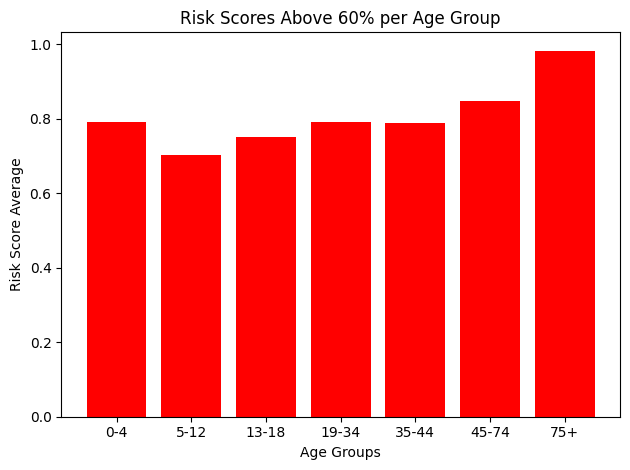

In [ ]:
import matplotlib.pyplot as plt

# Filter data for pregnant women
filtered_df8 = df[df['Risk Score'] > 0.6 ].groupby('Age Group')['Risk Score'].mean().reset_index()


# Create the bar plot for pregnant women (normalized)
plt.bar(filtered_df8["Age Group"], filtered_df8["Risk Score"], color='red')

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Risk Score Average')
plt.title("Risk Scores Above 60% per Age Group")


# Show the plot
plt.tight_layout()
plt.show()


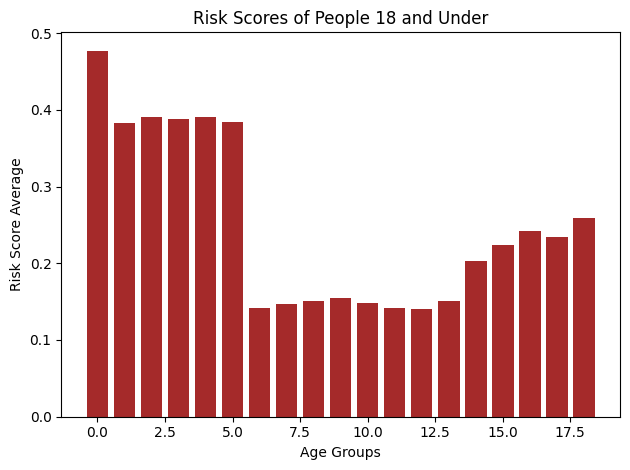

In [ ]:
import matplotlib.pyplot as plt

# Filter data for pregnant women
filtered_df9 = df[df['Age'] < 19 ].groupby('Age')['Risk Score'].mean().reset_index()


# Create the bar plot for pregnant women (normalized)
plt.bar(filtered_df9['Age'], filtered_df9['Risk Score'], color='brown')

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Risk Score Average')
plt.title("Risk Scores of People 18 and Under")


# Show the plot
plt.tight_layout()
plt.show()


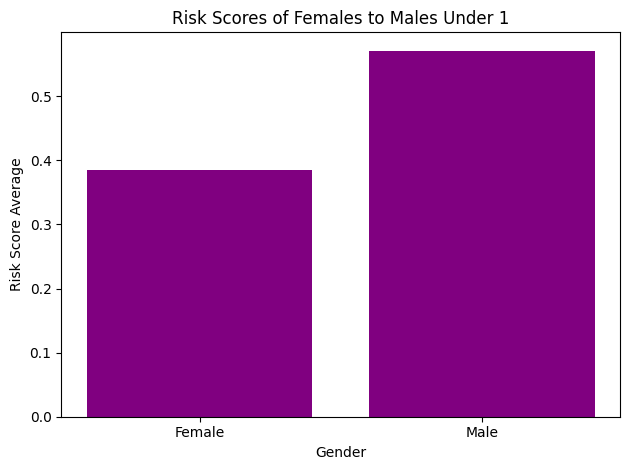

In [ ]:
import matplotlib.pyplot as plt

# Filter data for pregnant women
filtered_df9 = df[df['Age'] < 1].groupby('Gender')['Risk Score'].mean().reset_index()


# Create the bar plot for pregnant women (normalized)
plt.bar(filtered_df9['Gender'], filtered_df9['Risk Score'], color='purple')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Risk Score Average')
plt.title("Risk Scores of Females to Males Under 1")


# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
clusterdf = df

clusterdf = clusterdf.drop('Age Group', axis=1)

clusterdf.head()

,Age,Gender,Minor Pathology,Psychiatric Disorder,Diabetes,Cardiovascular Disease,Renal Disease,Pregnant,Risk Score
0,31,Female,0,0,0,0,0,0,0.035290
1,17,Male,0,0,0,0,0,0,0.162534
2,70,Female,0,0,0,1,1,0,0.924251
3,7,Male,0,0,0,0,0,0,0.117689
4,39,Female,0,0,0,0,0,0,0.247819


In [ ]:
clusterdf['Gender'] = clusterdf['Gender'].apply(lambda x: 0 if x=='Female' else 1)

# Supervised Learning- Regression:
1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'df' is your pandas DataFrame
X = clusterdf.drop('Risk Score', axis=1)
y = clusterdf['Risk Score']  # The target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7927340181116137

In [ ]:
pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.785065923779611

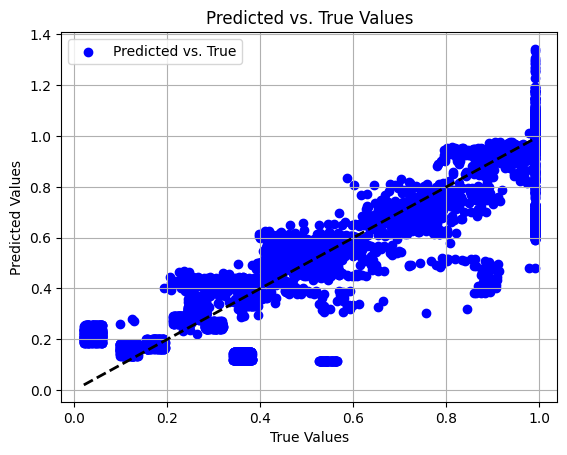

In [ ]:
plt.scatter(y_test, pred, c='blue', marker='o', label='Predicted vs. True')

# Add labels and a legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

# Show the plot
plt.title('Predicted vs. True Values')
plt.grid()
plt.show()

# Supervised Learning- Regression:
2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.0006215970431802969
Root Mean Squared Error: 0.024931847969621043


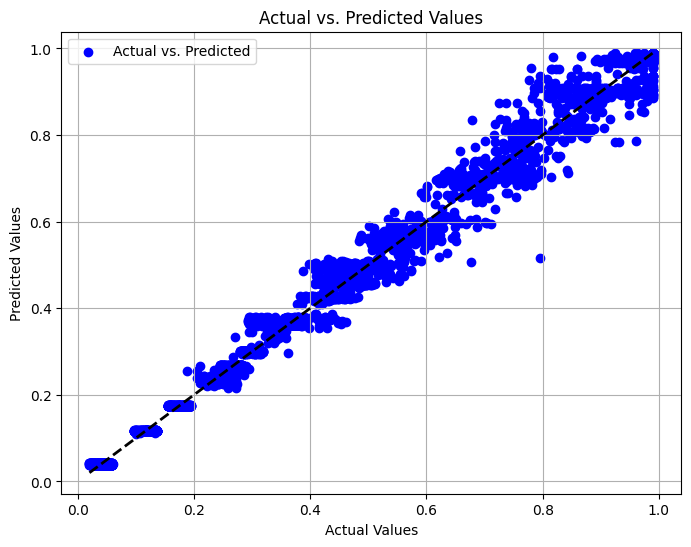

In [ ]:

# Create a scatter plot or line plot to compare actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)



# Show the plot
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()

# Supervised Learning- Regression:
3. Support Vector Regression (SVR)

In [ ]:
from sklearn import svm

svr = svm.SVR(kernel='linear')
svr.fit(X_train, y_train)
y_predict = svr.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.02040884626327257
Root Mean Squared Error: 0.14285953333002516


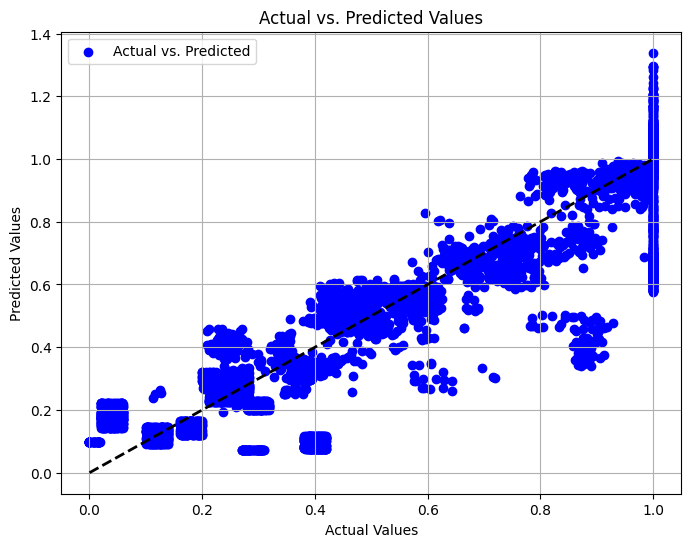

In [ ]:

# Create a scatter plot or line plot to compare actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, c='blue', marker='o', label='Actual vs. Predicted')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)



# Show the plot
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()

# Supervised Learning- Regression:
4. Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers


# grader-required-cell

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mean_squared_error') is not None and logs.get('mean_squared_error') < 0.00061:
            print("\nReaches mean squared error less than decision tree!")
            self.model.stop_training = True

callback = myCallback()

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.003), loss='mean_squared_error')  # Use MSE as the loss function for regression

model.fit(X_train, y_train, epochs=250, batch_size=300, validation_split=0.2, callbacks=[callback])  # Adjust the number of epochs and batch size as needed

# Make predictions on the test data
y_predi = model.predict(X_test)

# Calculate Mean Squared Error (MSE) or other regression metrics
mse = mean_squared_error(y_test, y_predi)
print(f'Mean Squared Error: {mse}')


Epoch 1/250
70/70 [==============================] - 1s 6ms/step - loss: 0.6123 - val_loss: 0.2224
Epoch 2/250
70/70 [==============================] - 0s 4ms/step - loss: 0.1075 - val_loss: 0.0869
Epoch 3/250
70/70 [==============================] - 0s 3ms/step - loss: 0.0529 - val_loss: 0.0355
Epoch 4/250
70/70 [==============================] - 0s 3ms/step - loss: 0.0348 - val_loss: 0.0263
Epoch 5/250
70/70 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.0594
Epoch 6/250
70/70 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.0157
Epoch 7/250
70/70 [==============================] - 0s 4ms/step - loss: 0.0168 - val_loss: 0.0179
Epoch 8/250
70/70 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.0184
Epoch 9/250
70/70 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.0097
Epoch 10/250
70/70 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.0212
Epoch 11/

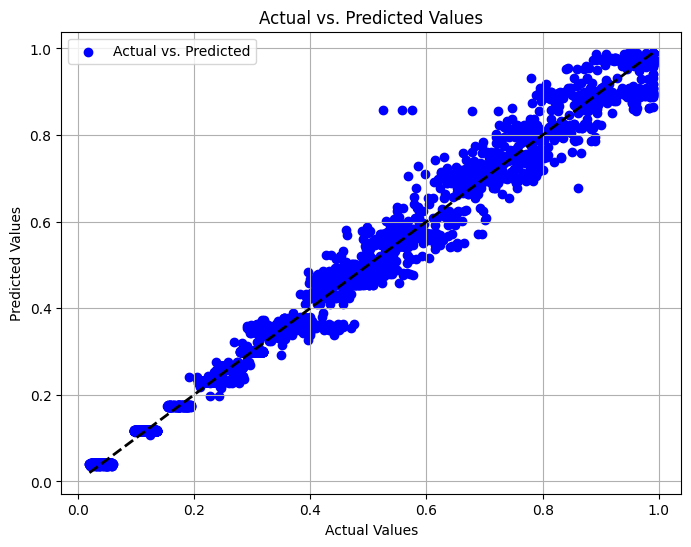

In [ ]:

# Create a scatter plot or line plot to compare actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)



# Show the plot
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()

# Supervised Learning- Regression:
5. K-Nearest Neighbor Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor().fit(X_train, y_train)
predicted_values = knn_model.predict(X_test)

print("Mean Squared Error = ", mean_squared_error(y_test, predicted_values))

Mean Squared Error =  0.002296602655703041


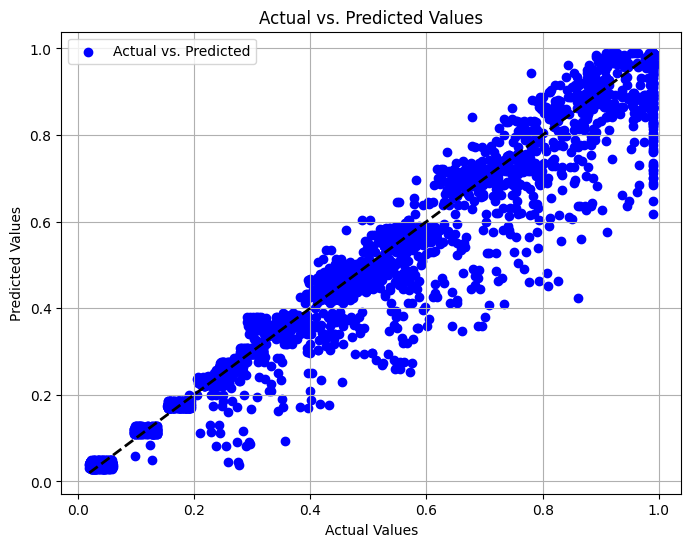

In [ ]:

# Create a scatter plot or line plot to compare actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values, c='blue', marker='o', label='Actual vs. Predicted')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)



# Show the plot
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()

# Conclusion

Decision tree seems to be the best choice with the smallest MSE and best visual represenation of acutal vs predicted.
Of course, we have to understand the data was generated and may have it's own flaws aswell. However, with the intention of continuous development as we gather more real data, the decision tree is the best model to move forward with.

Since we would want to prevent overfit and make room for the excess noise/ variability that was added to the generated data, I will experiment with Random Forest ensemble method.

## Fine tuning parameters with Optuna
- Optuna uses [Bayesian Optimization](https://www.youtube.com/watch?v=ECNU4WIuhSE). This is more efficient and faster than grid and random search
- It saves computational resources by terminating unpromising trials
- Supports parallel and distributed optimization
- Adjusts the search space based on previous trails, focusing on hyperparamters that are more promising and therefore yielding better results


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.2 MB/s eta 0:00:00


In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True) #setting log to true allows model to focus on smaller depths (2, 4) and explores the range of depths more effectively
    min_samples_split = trial.suggest_int('min_samples_split', 20, 200)

    # Create and train the model with the sampled hyperparameters
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor


# Create an Optuna Study object to manage the optimization
study = optuna.create_study(direction='minimize')  # Minimize MSE

# Start the optimization process
study.optimize(objective, n_trials=100)

# Access the best hyperparameters
best_params = study.best_params
print(f'Best Hyperparameters: {best_params}')

[I 2023-09-29 02:11:44,394] A new study created in memory with name: no-name-a03c7c9b-1e9c-4e95-8c9c-152d468f7ae1
[I 2023-09-29 02:11:45,738] Trial 0 finished with value: 0.0008126555519704458 and parameters: {'n_estimators': 99, 'max_depth': 32, 'min_samples_split': 154}. Best is trial 0 with value: 0.0008126555519704458.
[I 2023-09-29 02:11:55,603] Trial 1 finished with value: 0.0010721249618160951 and parameters: {'n_estimators': 480, 'max_depth': 9, 'min_samples_split': 124}. Best is trial 0 with value: 0.0008126555519704458.
[I 2023-09-29 02:12:04,532] Trial 2 finished with value: 0.0005875820882180761 and parameters: {'n_estimators': 369, 'max_depth': 22, 'min_samples_split': 23}. Best is trial 2 with value: 0.0005875820882180761.
[I 2023-09-29 02:12:12,090] Trial 3 finished with value: 0.0008120667829916988 and parameters: {'n_estimators': 281, 'max_depth': 19, 'min_samples_split': 154}. Best is trial 2 with value: 0.0005875820882180761.
[I 2023-09-29 02:12:21,058] Trial 4 finis

Best Hyperparameters: {'n_estimators': 409, 'max_depth': 18, 'min_samples_split': 20}


# Model with Best Hyperparmeters

```python
Best Hyperparameters: {'n_estimators': 409, 'max_depth': 18, 'min_samples_split': 20}
```

Mean Squared Error: 0.0005824677809914752
Root Mean Squared Error: 0.024134369289282767


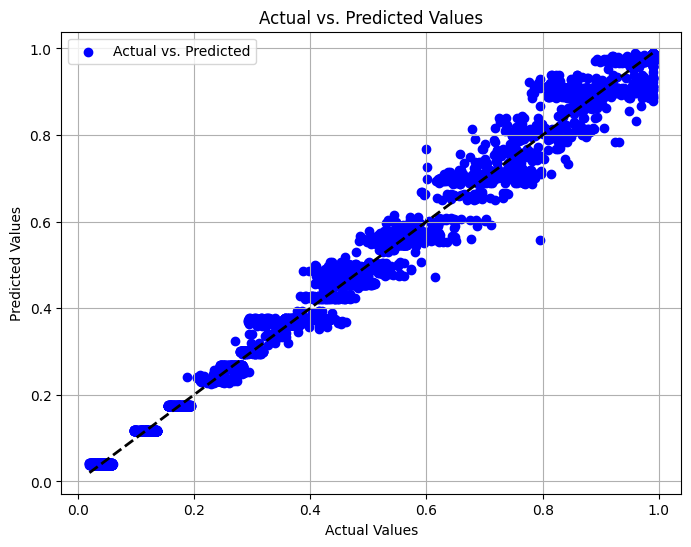

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_squared_error

reg = RandomForestRegressor(n_estimators=409, max_depth=18, min_samples_split=20, random_state=0)
reg.fit(X_train, y_train, )
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Create a scatter plot or line plot to compare actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)



# Show the plot
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()

# Thoughts

Although the MSE is small, there seems to be overfitting happening. The best thing to do to fight that is generate more data. Instead of using the previous data generating technique I am going to experiment with

> **GANs** : GANs can introduce variability into the data, potentially capturing diverse data instances that you might not have considered when manually generating data. [TabGan](https://arxiv.org/pdf/2010.00638.pdf)

> **SMOTE** :

> **Data Augmentation**

In [ ]:
# HIDE OUTPUT
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip install -r requirements.txt
!pip install tabgan

--2023-09-29 01:39:17--  https://raw.githubusercontent.com/Diyago/GAN-for-tabular-data/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     183  --.-KB/s    in 0s      

2023-09-29 01:39:17 (14.2 MB/s) - ‘requirements.txt’ saved [183/183]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.2/227.2 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled p

In [ ]:
# Split into training and test sets
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    clusterdf.drop("Risk Score", axis=1),
    clusterdf["Risk Score"],
    test_size=0.20,
    #shuffle=False,
    random_state=42,
)

# Create dataframe versions for tabular GAN
df_x_test, df_y_test = df_x_test.reset_index(drop=True), \
  df_y_test.reset_index(drop=True)
df_y_train = pd.DataFrame(df_y_train)
df_y_test = pd.DataFrame(df_y_test)


In [ ]:
import tabgan
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

new_train3, new_target3 = GANGenerator(gen_x_times=0.5, cat_cols=None, bot_filter_quantile=0.001,
                                       top_filter_quantile=0.999,
                                       is_post_process=True,
                                       adversarial_model_params={
                                           "metrics": "AUC", "max_depth": 90, "num_leaves": 10,
                                           "max_bin": 40, "n_estimators": 100,
                                          "learning_rate": 0.01,
                                      }, pregeneration_frac=2, only_generated_data=False,
                                      gan_params = {"batch_size": 100, "patience": 20, \
                                      "epochs" : 1,}).generate_data_pipe(df_x_train, df_y_train,
                                                                          df_x_test, deep_copy=True,
                                                                    only_adversarial=False,
                                                                     use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/9 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/1 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5200, number of negative: 5200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 10400, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5200, number of negative: 5200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

### Sanity Check

Text(0, 0.5, 'Count')

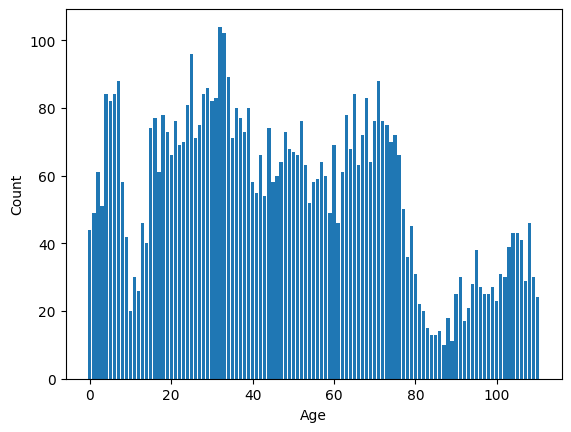

In [ ]:
vals = new_train3['Age'].where((new_train3['Pregnant'] == 1) & (new_train3['Gender'] == 0)).dropna().value_counts()
plt.bar(vals.index, vals.values)

# Label the axes
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

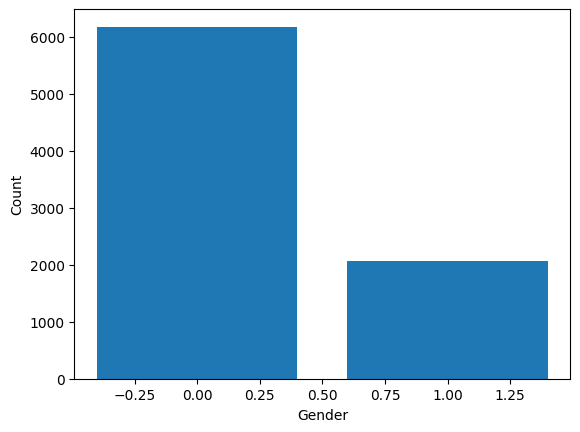

In [ ]:
vals = new_train3['Gender'].where(new_train3['Pregnant']==1).dropna().value_counts()
plt.bar(vals.index, vals.values)

# Label the axes
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

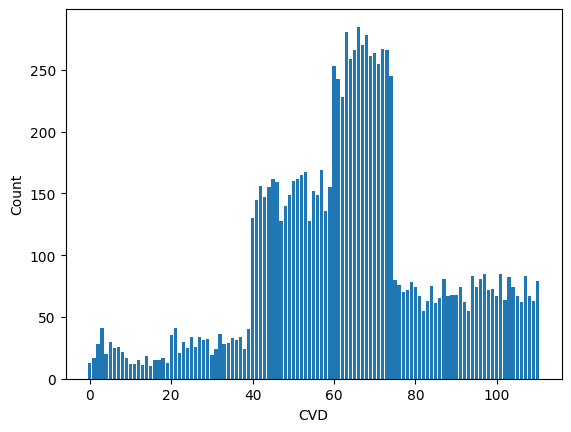

In [ ]:
vals = new_train3['Age'].where(new_train3['Cardiovascular Disease']==1).dropna().value_counts()
plt.bar(vals.index, vals.values)

# Label the axes
plt.xlabel('CVD')
plt.ylabel('Count')

In [ ]:
new_train3['Risk'] = new_target3
new_train3.head(15)

,Age,Gender,Minor Pathology,Psychiatric Disorder,Diabetes,Cardiovascular Disease,Renal Disease,Pregnant,Risk
0,50,1,0,0,0,0,0,1,0.563339
1,50,1,1,0,0,0,0,1,0.134524
2,50,1,0,0,0,0,0,1,0.415779
3,50,1,0,0,0,0,0,1,0.716609
4,50,1,0,0,0,0,0,1,0.343834
5,50,1,0,0,0,0,0,1,0.143135
6,50,1,0,0,0,0,0,1,0.357963
7,50,1,0,0,0,0,0,1,0.144397
8,50,1,0,0,0,0,0,1,0.200146
9,50,1,0,0,1,1,0,1,0.004538


# Conclusion on GANs

Not a good measure. We can see ages such as 110 have an extremely low Risk Score which is not reflective of research. Additionally, it is assigning pregnancy to ages above 60 and males.

From this I learned GANs are great for balancing classes but not good for situations where we need to generate data that is reflective of the already existing dataset.

# Supervised Learning- Regression:
2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.0006215970431802969
Root Mean Squared Error: 0.024931847969621043


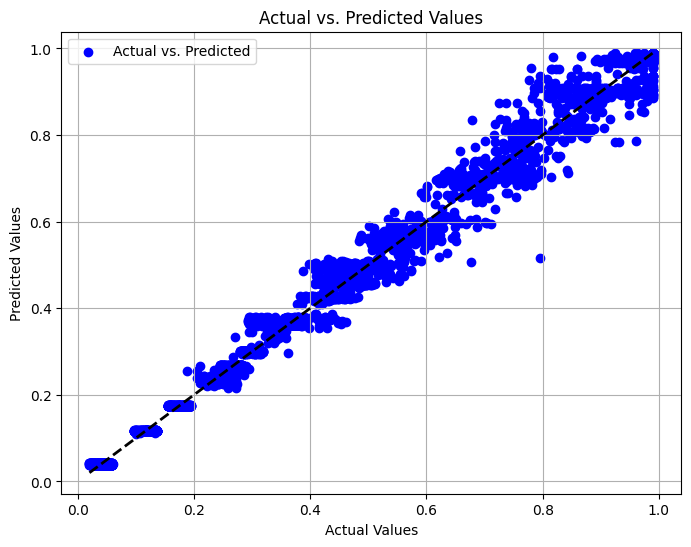

In [ ]:

# Create a scatter plot or line plot to compare actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)



# Show the plot
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()

In [ ]:
!pip install graphviz


In [ ]:
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz

# Export the tree to a DOT file
dot_data = export_graphviz(reg, out_file=None, feature_names=X_train.columns.tolist(), filled=True, rounded=True)

# Render the DOT file using Graphviz's interactive tool (requires Graphviz installed)
graph = graphviz.Source(dot_data)
graph.view()


'Source.gv.pdf'

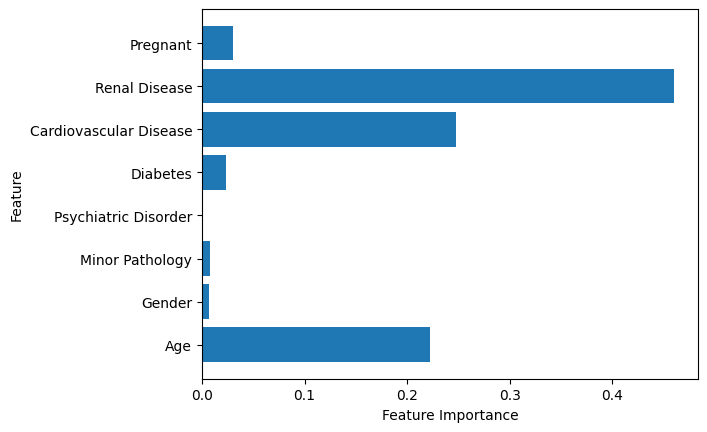

In [ ]:
import matplotlib.pyplot as plt
feature_names=X_train.columns.tolist()

feature_importance = reg.feature_importances_
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
df.corr()

,Age,Minor Pathology,Psychiatric Disorder,Diabetes,Cardiovascular Disease,Renal Disease,Pregnant,Risk Score
Age,1.000000,-0.007640,0.034249,0.043504,0.629351,0.358691,-0.084967,0.686673
Minor Pathology,-0.007640,1.000000,-0.007206,-0.003965,-0.005279,-0.000892,0.005952,0.084706
Psychiatric Disorder,0.034249,-0.007206,1.000000,-0.006531,0.021346,0.002389,0.004607,0.030931
Diabetes,0.043504,-0.003965,-0.006531,1.000000,0.073286,0.130016,-0.003134,0.229541
Cardiovascular Disease,0.629351,-0.005279,0.021346,0.073286,1.000000,0.238112,-0.105681,0.638252
Renal Disease,0.358691,-0.000892,0.002389,0.130016,0.238112,1.000000,-0.034041,0.676154
Pregnant,-0.084967,0.005952,0.004607,-0.003134,-0.105681,-0.034041,1.000000,0.046871
Risk Score,0.686673,0.084706,0.030931,0.229541,0.638252,0.676154,0.046871,1.000000


In [ ]:
# @title Model Demo Decision Tree
Age = 27 #@param {type:"integer"}
Gender =  "Male" #@param ["Male", "Female"]
CurrentlySick = "Yes" #@param ["No", "Yes"]
PsychiatricDisorder = "Yes" #@param ["No", "Yes"]
Diabetes = "Yes" #@param ["No", "Yes"]
CardiovascularDisease = "No" #@param ["No", "Yes"]
RenalDisease = "No" #@param ["No", "Yes"]
Pregnant = "No" #@param ["No", "Yes"]


input = [Age]
if Gender == 'Female':
  input.append(0)
elif Gender == 'Male':
  input.append(1)

for i in [CurrentlySick, PsychiatricDisorder, Diabetes, CardiovascularDisease, RenalDisease, Pregnant]:
  if i == 'No':
    input.append(0)
  elif i == 'Yes':
    input.append(1)

print("User input: ", input)
risk_score = reg.predict(np.array([input]))
print("Risk score: ", risk_score)

User input:  [78, 0, 0, 0, 0, 0, 0, 0]
Risk score:  [0.89133975]
